In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.cifar10.load_data()

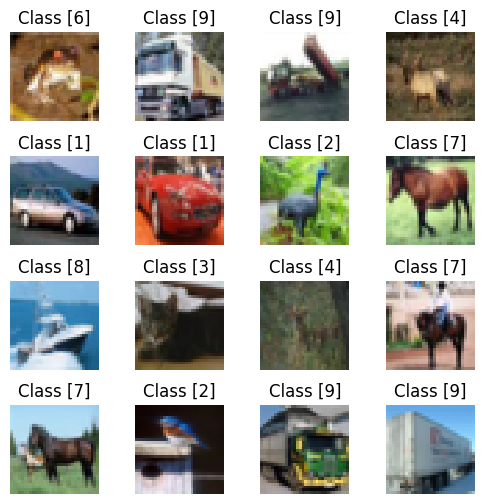

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray', interpolation='none')
    ax.set_title("Class {}".format(y_train[i]))
    ax.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [4]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype('float32')/255
x_train = np.expand_dims(x_train , -1)
x_test = np.expand_dims(x_test , -1)

In [5]:
print(x_train.shape)

(50000, 32, 32, 3, 1)


In [6]:
model = keras.Sequential([
        keras.Input(shape=[32,32 ,3]),
        keras.layers.Conv2D(32, kernel_size=(3, 3) ,padding='same' , activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3) ,padding='same', activation= 'relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

    
        keras.layers.Flatten(),
        keras.layers.Dense(128 , activation = 'relu'),
        keras.layers.Dense(10, activation="softmax")]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [8]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [9]:
model.fit(x_train , y_train , validation_split=0.25, batch_size=128, epochs=10)

Epoch 1/10
293/293 [==============================] - 16s 54ms/step - loss: 1.5534 - accuracy: 0.4443 - val_loss: 1.3629 - val_accuracy: 0.5242
Epoch 2/10
293/293 [==============================] - 17s 57ms/step - loss: 1.1969 - accuracy: 0.5809 - val_loss: 1.1687 - val_accuracy: 0.5966
Epoch 3/10
293/293 [==============================] - 17s 58ms/step - loss: 1.0417 - accuracy: 0.6370 - val_loss: 1.0440 - val_accuracy: 0.6402
Epoch 4/10
293/293 [==============================] - 17s 58ms/step - loss: 0.9471 - accuracy: 0.6686 - val_loss: 0.9946 - val_accuracy: 0.6566
Epoch 5/10
293/293 [==============================] - 17s 58ms/step - loss: 0.8680 - accuracy: 0.6963 - val_loss: 0.9437 - val_accuracy: 0.6754
Epoch 6/10
293/293 [==============================] - 17s 57ms/step - loss: 0.8000 - accuracy: 0.7218 - val_loss: 0.9425 - val_accuracy: 0.6769
Epoch 7/10
293/293 [==============================] - 17s 56ms/step - loss: 0.7407 - accuracy: 0.7427 - val_loss: 0.8894 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test, verbose=0)

[0.8983296751976013, 0.7017999887466431]

In [11]:
model.save('cifar10.h5')